<a href="https://colab.research.google.com/github/Druvith/NN_from_scratch2023/blob/main/optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 99.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:


In [2]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

In [3]:
def f(x):
  return x * torch.cos(np.pi * x)

def g(x):
  return f(x) + 0.2 * torch.cos(5 * np.pi * x)

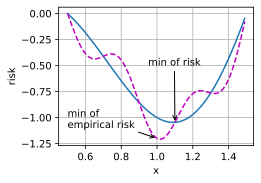

In [4]:
def annotate(text, xy, xytext):
  d2l.plt.gca().annotate(text, xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='->'))
  # text: text that needs to be place, xy: point that needs to be annotated, xytext: point where the text should be placed

x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of \nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))


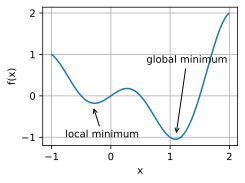

In [5]:
x = torch.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))

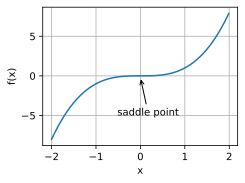

In [6]:
x = torch.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0,-0.2), (-0.52, -5.0))

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


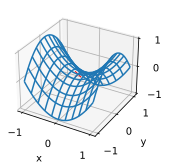

In [7]:
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101))
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');

  Vanishing Gradients

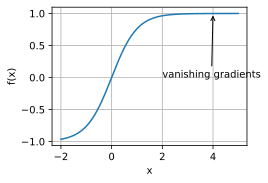

In [8]:
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradients', (4,1), (2,0.0))

In [9]:
#gradient descent

def f(x):
  return x ** 2

def f_grad(x):
  return 2 * x

In [10]:
#x = 10, n = 0.2, iterate x for 10 times to get to the optimal solution

def gd(eta, f_grad):
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x)
    results.append(float(x))
  print(f'epoch 10, x: {x:f}')
  return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


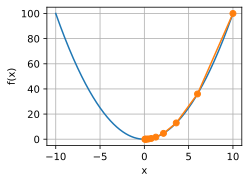

In [11]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

show_trace(results, f)

epoch 10, x: 3.486784


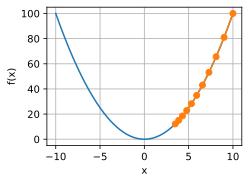

In [12]:
#low-learning rates

show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.917364


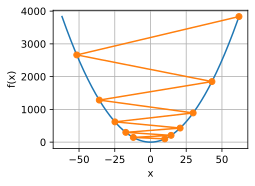

In [13]:
#high learning rates: gradient diverges

show_trace(gd(1.1, f_grad), f)

epoch 10, x: -1.528166


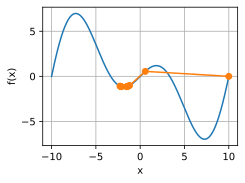

In [14]:
c = torch.tensor(0.15 * np.pi)

def f(x):
  return x * torch.cos(c * x)

def f_grad(x):
  return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

In [15]:
def train_2d(trainer, steps=20, f_grad=None):
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used in Momentum, adagrad, RMSProp
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                          torch.arange(-3.0, 1.0, 0.1), indexing='ij')
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


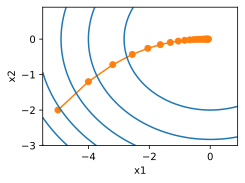

In [16]:
def f_2d(x1, x2):
  return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):
  return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
  g1, g2 = f_grad(x1, x2)
  return (x1 - eta * g1, x2 - eta * g2, 0, 0 )

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

epoch 10, x: tensor(0.)


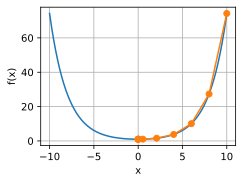

In [17]:
#Newton's method

c = torch.tensor(0.5)

def f(x):
  return torch.cosh(c * x)

def f_grad(x):
  return c * torch.sinh(c * x)

def f_hess(x):
  return c ** 2 * torch.cosh(c * x)

def newton(eta=1):
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x) / torch.abs(f_hess(x))
    results.append(float(x))
  print('epoch 10, x:', x)
  return results

show_trace(newton(), f)


epoch 10, x: tensor(7.2699)


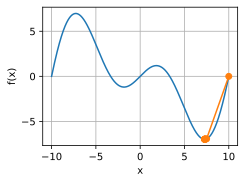

In [18]:
#for non convex function the objective functions diverges from the optimal

c = torch.tensor(0.15 * np.pi)

def f(x):
  return x * torch.cos( c * x)

def f_grad(x):
  return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):
  return torch.abs(- 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x))

show_trace(newton(0.5), f)



epoch 10, x: tensor(7.2699)


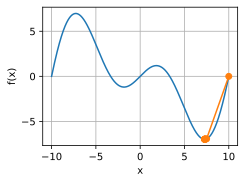

In [19]:
show_trace(newton(0.5), f)

In [20]:
#Pre-conditioning (only computes the diagonal entries of the hessian matrix)




epoch 50, x1: 0.091197, x2: -0.096109


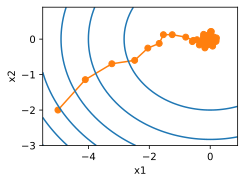

In [21]:
#STOCHASTIC GRADIENT DESCENT

def f(x1, x2):
  return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):
  return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
  g1, g2 = f_grad(x1, x2)
  g1 += torch.normal(0.0, 1, (1,)).item()
  g2 += torch.normal(0.0, 1, (1,)).item()
  eta_t = eta * lr()
  return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
  return 1

eta = 0.1
lr = constant_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

epoch 1000, x1: -0.918707, x2: -0.114892


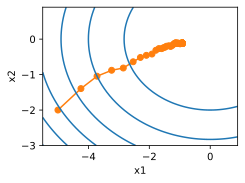

In [22]:
#exponential learning rate
import math

def exponential_lr():
  global t
  t += 1
  return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.045409, x2: -0.101153


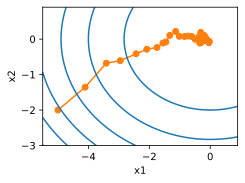

In [23]:
#polynomial deacy

def polynomial_lr():
  global t
  t += 1
  return ( 1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))


In [24]:
#Learning rates scheduling

In [25]:
%matplotlib inline
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

A = torch.zeros(256, 256)
B = torch.randn(256, 256)
C = torch.randn(256, 256)

In [26]:
class Timer:
  def __init__(self):
    self.times = []
    self.start()

  def start(self):
    self.tik = time.time()

  def stop(self):
    self.times.append(time.time() - self.tik)
    return self.times[-1]

  def avg(self):
    return sum(self.times) / len(self.times)

  def sum(self):
    return sum(self.times)

  def cumsum(self):
    return np.array(self.times).cumsum().tolist()

timer = Timer()

In [27]:
timer.start()

for i in range(256):
  for j in range(256):
    A[i, j] = torch.dot(B[i, :], C[:, j])

timer.stop()

1.1873140335083008

In [28]:
timer.start()
for j in range(256):
  A[:,j] = torch.mv(B, C[:, j])
timer.stop()

0.012793302536010742

In [29]:
# Compute A = BC in one go
timer.start()
A = torch.mm(B, C)
timer.stop()

gigaflops = [0.03 / i for i in timer.times]
print(f'performance in Gigaflops: element {gigaflops[0]:.3f}, '
      f'column {gigaflops[1]:.3f}, full {gigaflops[2]:.3f}')

performance in Gigaflops: element 0.025, column 2.345, full 1.959


In [30]:
#Reading the dataset

d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat','76e5be1548fd8222e5074cf0faae75edff8cf93f' )


def get_data_ch11(batch_size=10, n=1500):
  data = np.genfromtxt(d2l.download('airfoil'),
                       dtype=np.float32, delimiter='\t')
  data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
  data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]),
                             batch_size, is_train = True)
  return data_iter, data.shape[1]-1

In [31]:
#Implementation from scratch

def sgd(params, states, hyperparams):
  for p in params:
    p.data.sub_(hyperparams['lr'] * p.grad)
    p.grad.data.zero_()

In [32]:

def train_ch11(trainer_fn, states, hyperparams, data_iter,
               feature_dim, num_epochs=2):
    # Initialization
    w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1),
                     requires_grad=True)
    b = torch.zeros((1), requires_grad=True)
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    # Train
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X), y).mean()
            l.backward()
            trainer_fn([w, b], states, hyperparams)
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
                animator.add(n/X.shape[0]/len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss),))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/epoch')
    return timer.cumsum(), animator.Y[0]

loss: 0.246, 0.044 sec/epoch


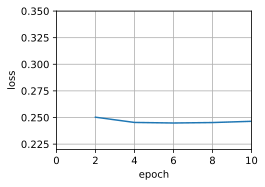

In [33]:
def train_sgd(lr, batch_size, num_epochs=2):
  data_iter, feature_dim = get_data_ch11(batch_size)
  return train_ch11(
      sgd, None, {'lr': lr}, data_iter, feature_dim, num_epochs
  )

gd_res = train_sgd(1, 1500, 10)

In [34]:
d2l.set_figsize([6,3])
d2l.plot(*list(map(list, zip(gd_res, sgd_res, mini1_res, mini2_res))),
         'time(sec)', 'loss', xlim=[1e-2, 10],
         legend=['gd', 'sgd', 'batch size =100', 'batch size = 10'])
d2l.plt.gca().set_xscale('log')

NameError: ignored

In [47]:

def train_consise_ch11(trainer_fn, hyperparams, data_iter, num_epochs=4):
  net = nn.Sequential(nn.Linear(5,1))
  def init_weights(module):
    if type(module) == nn.Linear:
      torch.nn.init.normal_(module.weight, std=0.01)
  net.apply(init_weights)

  optimizer = trainer_fn(net.parameters(), **hyperparams)
  loss = nn.MSELoss(reduction = 'none')
  animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[0, num_epochs], ylim=[0.22, 0.35])
  n, timer = 0, d2l.Timer()

  for _ in range(num_epochs):
    for X, y in data_iter:
      optimizer.zero_grad()
      out = net(X)
      y = y.reshape(out.shape)
      l = loss(out, y)
      l.mean().backward()
      optimizer.step()
      n += X.shape[0]
      if n % 200 == 0:
        timer.stop()
        animator.add(n/X.shape[0]/len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss) / 2,))
        timer.start()
  print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/ epoch')

loss: 0.243, 0.126 sec/ epoch


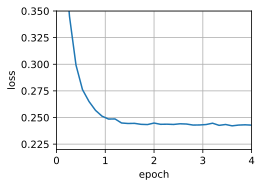

In [49]:
data_iter, _ = get_data_ch11(10)
trainer = torch.optim.SGD
train_consise_ch11(trainer, {'lr': 0.01}, data_iter)